# Importing Libraries


In [1]:
import pandas as pd  ## Processing
import numpy as np  ##Linear Algebra
import matplotlib.pyplot as plt ## Plots
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, MaxPool2D, Conv2D, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from keras.utils.np_utils import to_categorical

sns.set(style = 'white', context = 'notebook', palette = 'deep')

%matplotlib inline

# Gathering Data Set

In [2]:
## Loading train Dataset

df_train = pd.read_csv("../input/digit-recognizer/train.csv")

In [3]:
## A glimpse at the data

df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## showing total values and columns

df_train.shape

(42000, 785)

In [5]:
# Loading test data

df_test = pd.read_csv('../input/digit-recognizer/test.csv')

In [6]:
## A look at the test data

df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
## values and colums of the test data

df_test.shape

(28000, 784)

# EDA/Processing

<AxesSubplot:>

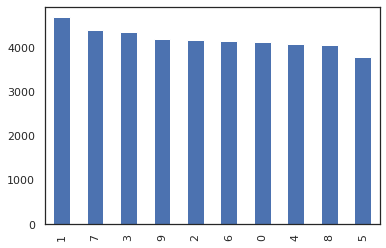

In [8]:
y_train = df_train['label']

X_train = df_train.drop(labels = ['label'], axis = 1)

hist = y_train.value_counts()

hist.plot.bar()

In [9]:
## checking for missing values in the data

df_train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
## Normalization

X_train = X_train / 255.0

df_test = df_test / 255.0

In [11]:
## Reshape

X_train = X_train.values.reshape(-1, 28,28, 1)

df_test = df_test.values.reshape(-1, 28,28, 1)

In [12]:
## Label Encoding

y_train = to_categorical(y_train, num_classes = 10)

In [13]:
## Split training testing/training

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size
                                                   = 0.1, random_state = 2)

In [14]:
## Showing split data

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (37800, 28, 28, 1)
X_test shape:  (4200, 28, 28, 1)
y_train shape:  (37800, 10)
y_test shape:  (4200, 10)


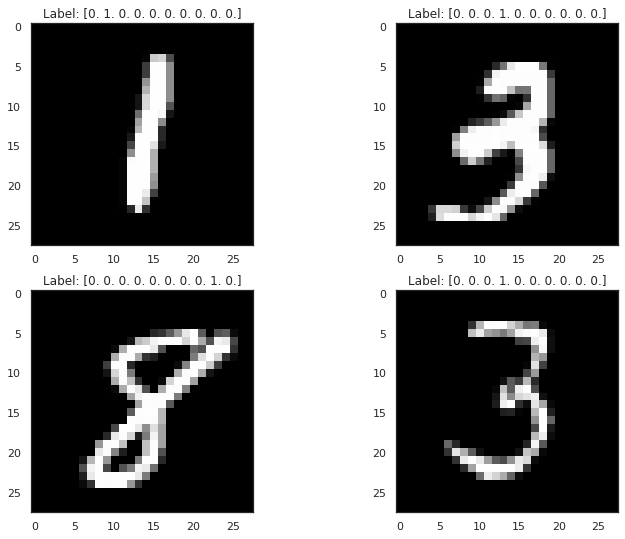

In [15]:
nrows = 2

ncols = 2

pic_indexes = np.random.randint(X_train.shape[0], size
                             =(nrows * ncols))

f, axs = plt.subplots(nrows, ncols, figsize = (12,9))

axs = axs.flatten()

picture_index = 0

for picture_index, ax in zip(pic_indexes, axs):
    ax.imshow(X_train[picture_index].reshape(28, 28), cmap = 'gray')
    
    ax.set_title(f'Label: {y_train[picture_index]}')
    
    
plt.show()

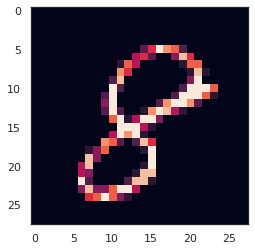

In [16]:
g = plt.imshow(X_train[0][:, :, 0])

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

# CNN

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', 
                activation = 'relu', input_shape = (28, 28, 1)))
                

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation
                 = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding 
                = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding
                = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [20]:
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay
                  = 0.0)

In [21]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics
             = ['accuracy'])

In [22]:
learning_reduction = ReduceLROnPlateau(monitor = 'val_loss',
                                     patience = 3,
                                     verbose = 1,
                                     factor = 0.5,
                                     min_lr = 0.00001)

In [23]:
epochs = 50 

batch_size = 86

****Augmentation****

In [24]:
datagen = ImageDataGenerator(
       
        featurewise_center=False, 
       
        samplewise_center=False,  
       
        featurewise_std_normalization=False, 
      
        samplewise_std_normalization=False, 
      
        zca_whitening=False,  
       
        rotation_range=10, 
       
        zoom_range = 0.1,  
        
        width_shift_range=0.1,  
            
        height_shift_range=0.1, 
        
        horizontal_flip=False,  
        
        vertical_flip=False) 


datagen.fit(X_train)


In [25]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_reduction])

Epoch 1/50
439/439 - 14s - loss: 0.4413 - accuracy: 0.8584 - val_loss: 0.0632 - val_accuracy: 0.9795
Epoch 2/50
439/439 - 10s - loss: 0.1291 - accuracy: 0.9611 - val_loss: 0.0465 - val_accuracy: 0.9857
Epoch 3/50
439/439 - 10s - loss: 0.0948 - accuracy: 0.9707 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 4/50
439/439 - 10s - loss: 0.0793 - accuracy: 0.9775 - val_loss: 0.0453 - val_accuracy: 0.9876
Epoch 5/50
439/439 - 10s - loss: 0.0717 - accuracy: 0.9783 - val_loss: 0.0344 - val_accuracy: 0.9905
Epoch 6/50
439/439 - 9s - loss: 0.0657 - accuracy: 0.9809 - val_loss: 0.0271 - val_accuracy: 0.9924
Epoch 7/50
439/439 - 9s - loss: 0.0613 - accuracy: 0.9817 - val_loss: 0.0295 - val_accuracy: 0.9905
Epoch 8/50
439/439 - 10s - loss: 0.0602 - accuracy: 0.9824 - val_loss: 0.0259 - val_accuracy: 0.9921
Epoch 9/50
439/439 - 10s - loss: 0.0602 - accuracy: 0.9835 - val_loss: 0.0210 - val_accuracy: 0.9936
Epoch 10/50
439/439 - 10s - loss: 0.0585 - accuracy: 0.9836 - val_loss: 0.0446 - val_accuracy

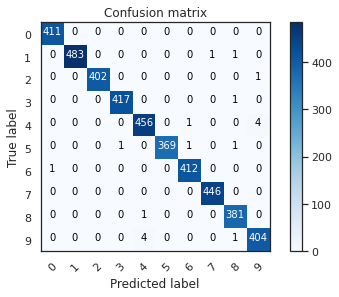

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Y_pred = model.predict(X_test)
 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [27]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test Accuracy: ', score[1])

Test Accuracy:  0.9954761862754822


# Tripple CNN

In [28]:
def get_newtriplecnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = (28,28,1)),
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same' ),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        
        Flatten(),
          
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(10, activation = "softmax")
        
    ])

In [29]:
model = get_newtriplecnn()

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)       

In [30]:
callbacks1 = [ 
    EarlyStopping(monitor = 'loss', patience = 6), 
    ReduceLROnPlateau(monitor = 'loss', patience = 3), 
    ModelCheckpoint('model.best.hdf5', save_best_only=True) # saving the best model
]

In [31]:
history = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = 50,
                               steps_per_epoch = X_train.shape[0] // batch_size,
                               validation_data = (X_test, y_test),
                               callbacks = callbacks1,
                             )

Epoch 1/50
439/439 [==============================] - 13s 26ms/step - loss: 1.3656 - accuracy: 0.5659 - val_loss: 2.4223 - val_accuracy: 0.4460
Epoch 2/50
439/439 [==============================] - 11s 26ms/step - loss: 0.1978 - accuracy: 0.9414 - val_loss: 0.0702 - val_accuracy: 0.9793
Epoch 3/50
439/439 [==============================] - 12s 28ms/step - loss: 0.1415 - accuracy: 0.9586 - val_loss: 0.0727 - val_accuracy: 0.9774
Epoch 4/50
439/439 [==============================] - 11s 26ms/step - loss: 0.1104 - accuracy: 0.9692 - val_loss: 0.0929 - val_accuracy: 0.9748
Epoch 5/50
439/439 [==============================] - 12s 27ms/step - loss: 0.0902 - accuracy: 0.9741 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 6/50
439/439 [==============================] - 12s 27ms/step - loss: 0.0839 - accuracy: 0.9763 - val_loss: 0.0420 - val_accuracy: 0.9886
Epoch 7/50
439/439 [==============================] - 11s 26ms/step - loss: 0.0773 - accuracy: 0.9788 - val_loss: 0.0492 - val_accuracy:

In [32]:
result = model.predict(df_test)

result = np.argmax(result, axis=1)

result = pd.Series(result, name ='Label')

In [33]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)

submission.to_csv("./submission_cnn.csv",index=False)